# Qiskit 설치 (colab에서는 새션이 새로 시작될 때, 코랩에서 제공하는 기본 패키지가 아니면, 새로 설치해야 함)!

In [1]:
from google.colab import output

!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer

output.clear()

## 양자회로를 활용한 한자리 수 더하기

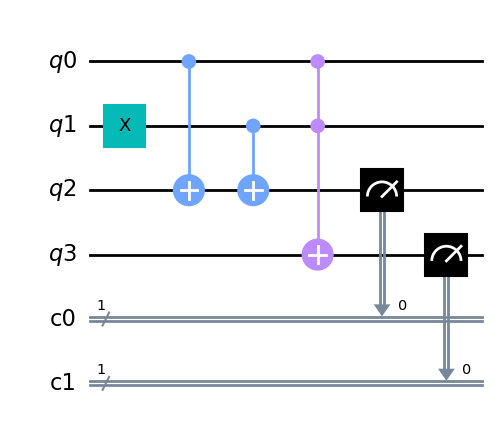

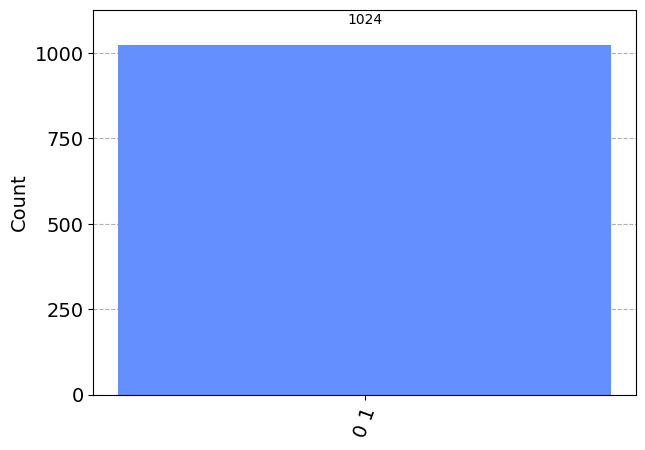

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

q0 = QuantumRegister(1, "q0")
q1 = QuantumRegister(1, "q1")
q2 = QuantumRegister(1, "q2")
q3 = QuantumRegister(1, "q3")

c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")

circuit = QuantumCircuit(q0,q1,q2, q3, c0, c1)

# 0+ 1 =  0 1 (c1 에는 자릿수 올림 CCX, c0에는 두 수 더하기를 각 기록)
#circuit.x(0)
circuit.x(1)

circuit.cx(0,2)
circuit.cx(1,2)

circuit.ccx(0,1,3)

circuit.measure(q2, c0)
circuit.measure(q3, c1)

# c1 c0

display(circuit.draw("mpl"))

from qiskit_aer import AerSimulator

#shots 의 기본값은 1024
result = AerSimulator().run(circuit).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

## 위 양자회로를 이용한 양자 더하기 함수를 정의

In [5]:
def QuantumAdder(x1, x2):

  qreg_q= QuantumRegister(4, 'q')
  creg_c = ClassicalRegister(2, 'c')
  circuit = QuantumCircuit(qreg_q, creg_c)

  if x1 == 1 : circuit.x(qreg_q[0])
  if x2 == 1 : circuit.x(qreg_q[1])

  circuit.cx(qreg_q[0],qreg_q[2])
  circuit.cx(qreg_q[1],qreg_q[2])

  circuit.ccx(qreg_q[0],qreg_q[1],qreg_q[3])

  circuit.measure(qreg_q[2], creg_c[0])
  circuit.measure(qreg_q[3], creg_c[1])

  result = AerSimulator().run(circuit, shots=1).result()
  statistics = result.get_counts()
  display(plot_histogram(statistics))



### 양자더하기 함수의 실행

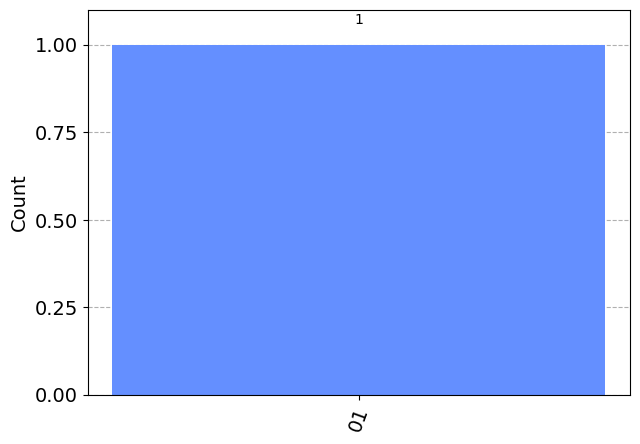

In [9]:
QuantumAdder(0,1)

# 3 큐빗에서 양자 오류 확인 및 정정

세번째 큐빗에 에러


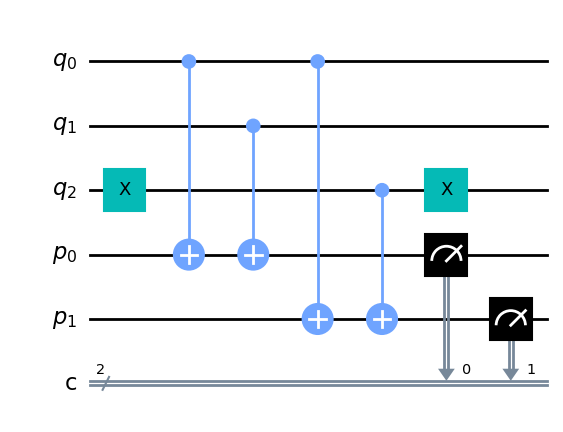

In [14]:
import random

error = random.randint(0,2)

qreg_q= QuantumRegister(3, 'q')
parity_q= QuantumRegister(2,'p')

creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, parity_q, creg_c)

circuit.x(qreg_q[error]) # 전송 중 에러 발생

circuit.cx(qreg_q[0],parity_q[0])
circuit.cx(qreg_q[1],parity_q[0])

circuit.cx(qreg_q[0],parity_q[1])
circuit.cx(qreg_q[2],parity_q[1])

circuit.measure(parity_q[0], creg_c[0])
circuit.measure(parity_q[1], creg_c[1])

result = AerSimulator().run(circuit, shots=1, memory=True).result()
measurements = result.get_memory()
if measurements[0] == "00" :
  print('에러가 없음')
elif measurements[0] == "10" :
  print('세번째 큐빗에 에러')
  circuit.x(qreg_q[2])
elif measurements[0] == "01" :
  print('두번째 큐빗에 에러')
  circuit.x(qreg_q[1])
else :
  print('첫번째 큐빗에 에러')
  circuit.x(qreg_q[0])

display(circuit.draw("mpl"))
